In [1]:
from components.HistoryGraph import HistoryGraph
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.svm import SVC
from components.lib import execute_graph
from components.lib import view_dictionary, graphviz_draw
from components.parser.parser import extract_artifact_graph
from dictionary.Evaluating.F1_score import F1ScoreCalculator
warnings.filterwarnings('ignore')
from dictionary.Preprocessing.PCA.GPU__PCA import GPU__PCA

C:\Python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



<img src="intro.png" alt="image" width="1200" height="auto">

# Collaborative fueled discovery with Hyppo
---

In [2]:
History = HistoryGraph("HIGGS_history")
dataset_id = "HIGGS"

In [3]:
History.best_metrics_achieved(dataset_id)

,operator,highest_value,lowest_value
0,AccuracyCalculator,0.636667,0.560000
1,F1ScoreCalculator,0.836667,0.836667
2,MAECalculator,0.440000,0.440000


In [4]:
History.retrieve_best_pipeline(dataset_id, metric="F1ScoreCalculator")

['StandardScaler()',
 'PCA(n_components=3)',
 'DecisionTreeClassifier()',
 'F1ScoreCalculator']

# Pipeline tuning with Hyppo
---

In [5]:
History.popular_operators(dataset_id)

[('PCA(n_components=3)', 15),
 ('StandardScaler()', 9),
 ('SVC()', 5),
 ('GPU__PCA(n_components=3)', 3),
 ('DecisionTreeClassifier()', 1)]

In [6]:
view_dictionary()

->dictionary
->    Ensembling
        $CustomAverageEnsemble.py
        $CustomStackingEnsemble.py
        $StackingEnsemble.py
        $VotingEnsemble.py
->    Evaluating
        $ComputeAccuracy.py
        $ComputeAUC.py
        $F1_score.py
        $MAECalculator.py
        $MPECalculator.py
        $MSECalculator.py
->        __pycache__
->    Learning
->        Classifiers
->            NLP
                $TF__MLP.py
                $TR__MLP.py
->            SVM
                $GL_LibSVMEstimator.py
                $PolynomialSVM_TensorFlow.py
                $SVM_PyTorch.py
                $SVM_TensorFlow.py
                $TF_SV.py
->        Regressors
            $GL__DecisionTreeRegressor.py
            $GL__KNeighborRegressor.py
            $GL__LassoGLM.py
            $GL__LGBM.py
            $TF_Ridge.py
            $TF__LinearRegressor.py
->    Preprocessing
->        CustomFunction
            $GL_PolynomialFeatures.py
            $Taxi_DateTimeFeatures.py
            

In [7]:
user1_pipe = Pipeline([('scaler', StandardScaler()), ('pca', GPU__PCA(n_components=3)), ('SVC', SVC()), ('F1', F1ScoreCalculator())])
History.execute_and_add(dataset_id, user1_pipe)

F1 Score:  0.956


'HISKStGPPCSKSVSKF12886_score'

# Pipeline optimization with Hyppo
---

In [8]:
optimized_pipe = History.optimize_pipeline(dataset_id, user1_pipe)
compute_tasks, load_tasks, request = execute_graph('HIGGS', optimized_pipe)
request

0.956

In [9]:
load_tasks

['HISKStGPPCSKSVSKF12886_score']

In [10]:
compute_tasks

[['F1ScoreCalculator.score']]

# Hyppo Overview
![alt text](HYPPO_v3.png)
---
### 1) Hyppo's Parser

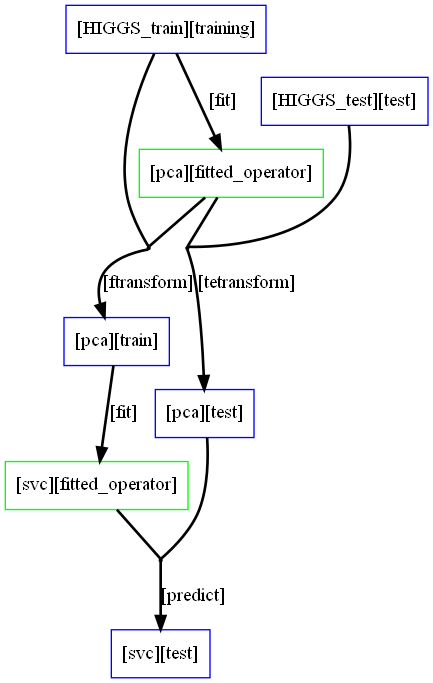

'HISKPCSKSV9009_predict'

In [11]:
user1_pipe = Pipeline([('pca', PCA(n_components=3)), ('svc', SVC())])
artifact_graph, request = extract_artifact_graph(dataset_id, user1_pipe)
graphviz_draw(artifact_graph, type='notebook',  mode='use_alias')
request

### 2) Hyppo's History

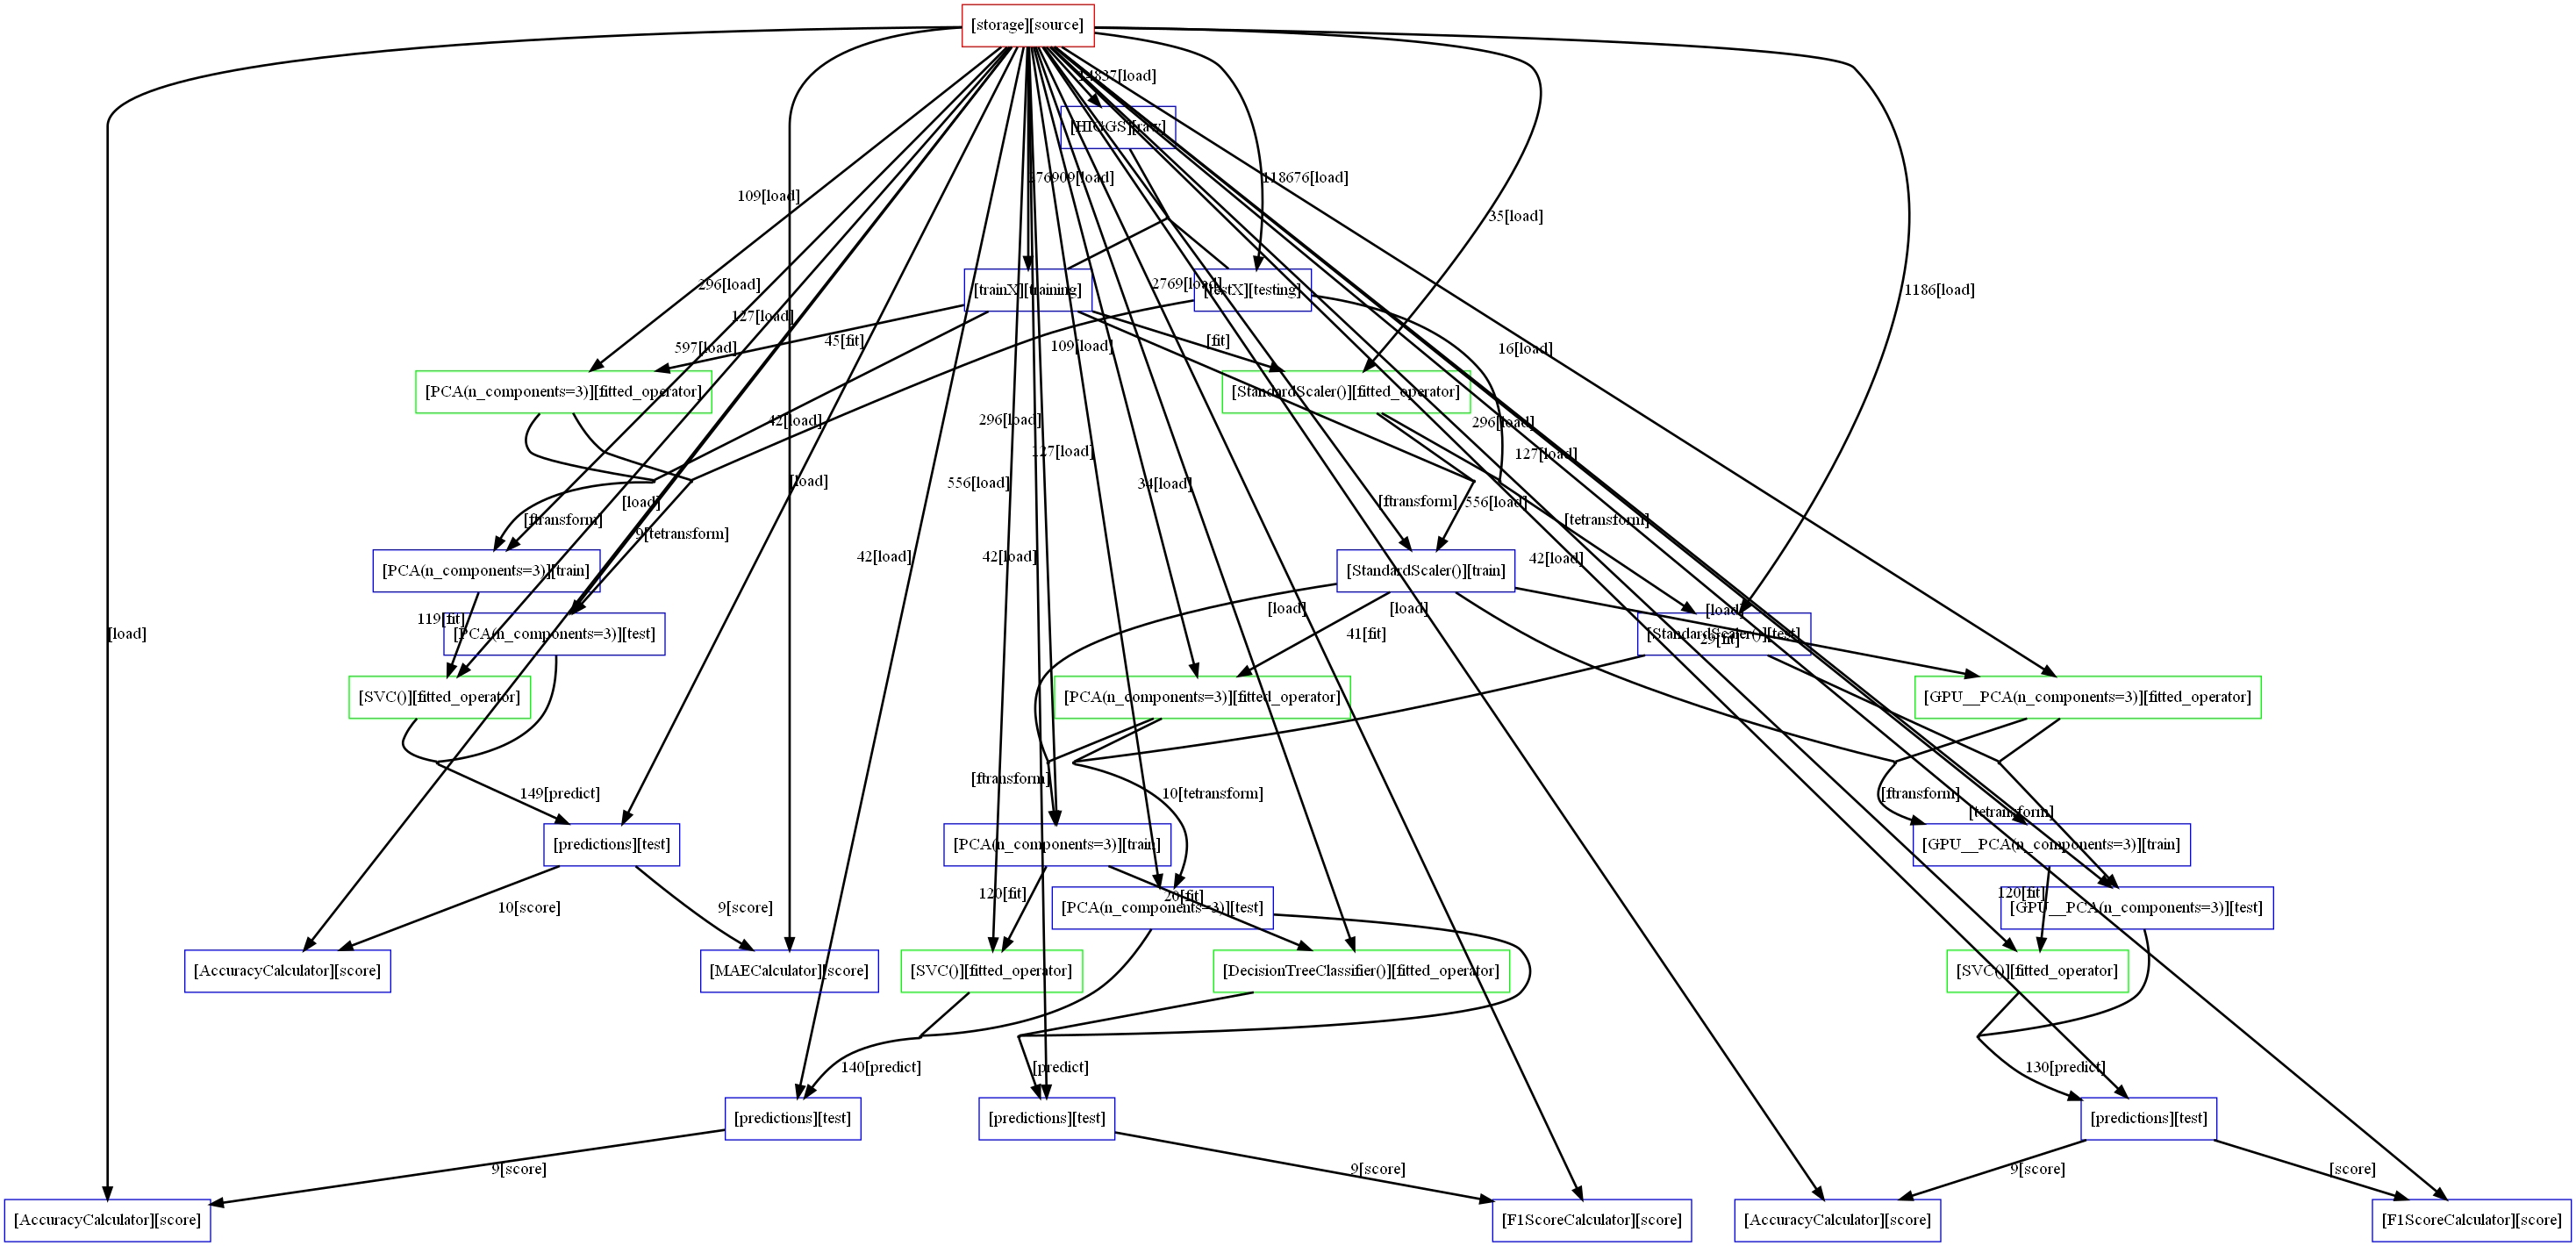

In [12]:
History.visualize(type='notebook', mode='use_alias')

### 3) Augmenter

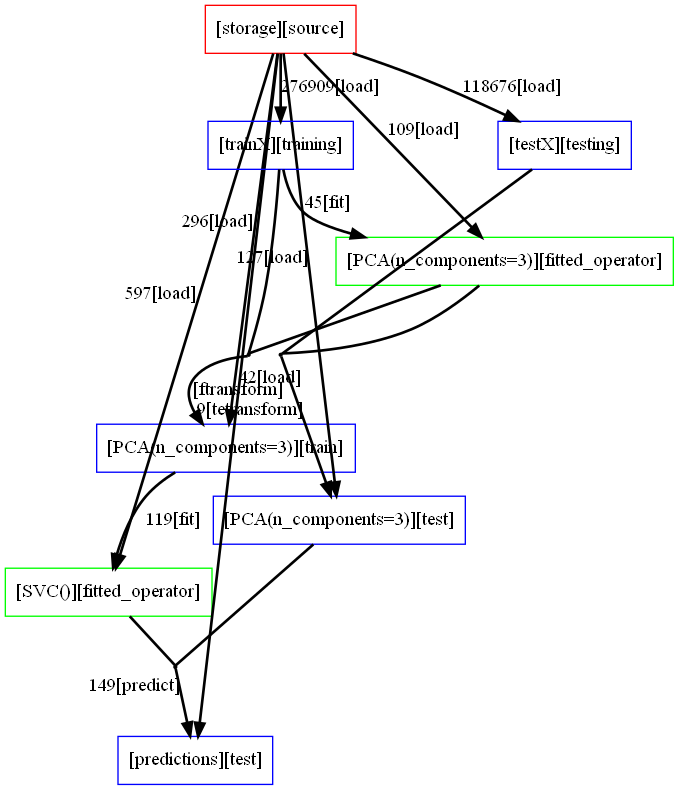

In [13]:
#History.printArtifacts() #HISKStSKPC4529_ftransform
History.visualize_augmented(dataset_id, type='notebook', mode='use_alias', filter_artifact_id="HISKPCSKSV9009_predict", filter = 'retrieve')

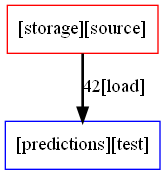

In [14]:
pipe = History.optimal_retrieval_plan(dataset_id,["HISKPCSKSV9009_predict"])
graphviz_draw(pipe[0][1], 'notebook','use_alias')